# _automaton_.reduce

Computes an equivalent automaton with a minimal number of states.

Preconditions:
- its labelset is free
- its weightset is a _division ring_ or $\mathbb{Z}$.

Postconditions:
- the result is equivalent to the input automaton
- the result is both accessible and co-accessible

## Examples

In [1]:
import vcsn

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

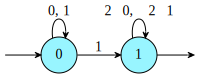

In [2]:
valuation = vcsn.context('lal_char(01), z').expression("(0+1)*1(<2>0+<2>1)*").automaton()
valuation

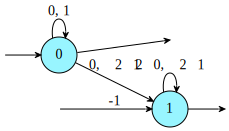

In [3]:
red = valuation.reduce()
red

The result is not canonical. Moreover, in $\mathbb{Z}$ the algorithm is not idempotent. In fields, the implementation ensures that the reduction of reduced automaton results in a isomorphic automaton.

### Algorithm

The core of the algorithm is the left-reduction procedure.

The reduction algorithm of an automaton $\mathcal{A}$ is left-reduction $\circ$ transpose $\circ$ left-reduction $\circ$ transpose ($\mathcal{A}$).

The left-reduction algorithm deals with weighted sets of states, seen as vectors of a vector space with the same dimension as the automaton. It computes greedily a basis of the smallest subspace which contains every accessible weighted set of states.

For efficiency, the basis is scaled, initialized with the initial vector.

Each time a vector is added to the bases, for each letter, a new candidate is built as the successor of the vector by the letter.

Every candidate is reduced with respect to the basis. If the result is not null, the new vector is added to the basis; the pivot of this vector is chosen w.r.t. heuristics for increase numeric stability, and, in case of fields, the vector is normalized in such a way that the pivot equals 1.

In $\mathbb{Z}$, the reduction of a new vector w.r.t. the basis may modify the basis: let $b$ be a vector of the basis with pivot $b_i$, $v$ a new vector, and let $\alpha$ and $\beta$ be such that $\alpha b_i+ \beta v_i=\mathsf{gcd}(b_i,v_i)$; then 
$$
\left[\begin{array}{c}b'\\v'\end{array}\right]
=
\left[\begin{array}{cc}\alpha & \beta \\-\frac{v_i}{\mathsf{gcd}(b_i,v_i)} & \frac{b_i}{\mathsf{gcd}(b_i,v_i)} \end{array}\right]
\left[\begin{array}{c}b\\v\end{array}\right]
$$

In fields, once the scaled basis is built, a "bottom-up" procedure is applied to make more entries of the vector of the basis equal to 0. If the input automaton is reduced, the resulting basis is then the canonical basis.

Finally, an automaton is built where each state is a vector of the basis.
